# Supervised Machine Learning: Regression - Final Project


## Import the required libraries


In [144]:
import pandas as pd
import numpy as np

## Importing the Dataset


In [145]:
#data = pd.read_csv('final_data.csv')
#data = data.drop(['player', 'name', 'position'], axis =1)
#data = pd.get_dummies(data)
#data.shape
#data.to_csv('football_cleaned.csv', index=False)

In [146]:
data = pd.read_csv('football_cleaned.csv')
data.head()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,...,team_West Ham United,team_Western Sydney Wanderers,team_Western United FC,team_Wigan Athletic,team_Wolfsberger AC,team_Wolverhampton Wanderers,team_Yokohama F. Marinos,team_Yokohama FC,team_Zenit St. Petersburg,team_Ümraniyespor
0,189.0,32.0,104,0.000000,0.000000,0.009585,0.0,0.0,1.217252,0.335463,...,False,False,False,False,False,False,False,False,False,False
1,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.0,1.242331,0.207055,...,False,False,False,False,False,False,False,False,False,False
2,188.0,37.0,4,0.000000,0.000000,0.000000,0.0,0.0,0.616438,0.924658,...,False,False,False,False,False,False,False,False,False,False
3,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,0.0,0.000000,0.000000,...,False,False,False,False,False,False,False,False,False,False
4,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,0.0,0.000000,0.000000,...,False,False,False,False,False,False,False,False,False,False


## 1. About the Data


This dataset contains information about football players and their current transfer values. Here's a breakdown of the key points:

Goal: Predict the current transfer value of a player (regression problem).

Data: The dataset includes 10754 rows (players) and 392 columns (features) containing information about the players, including:

Physical attributes (height, age)
Performance statistics (appearances, goals, assists, cards)
Injury data (days injured, games injured)
Awards
Current and highest transfer values
Playing position (encoded as a number)
Winger position (binary)
One-hot encoded team names (not used for modeling)

Data Cleaning and Feature Engineering:

Player names were removed.
Positions were label encoded (0, 1, 2, ...).
Some features were one-hot encoded (e.g., awards).
Further feature scaling and polynomial feature engineering might be applied to specific features mentioned in the headers section.

In [147]:
data.shape

(10754, 392)

In [148]:
data.dtypes.value_counts()

bool       374
float64      9
int64        9
Name: count, dtype: int64

In [149]:
data.describe() 

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


In [150]:
headers = [
    "height",
    "age",
    "appearance",
    "goals",
    "assists",
    "yellow cards",
    "second yellow cards",
    "red cards",
    "goals conceded",
    "clean sheets",
    "minutes played",
    "days_injured",
    "games_injured",
    "award",
    "highest_value",
    "position_encoded",
    "winger"
]

## 2. Objectives
The main objective of this analysis is to develop a model that can accurately predict the current transfer value of football players based on the provided dataset. This will be a regression problem, where the model will learn the relationship between various player attributes and their corresponding transfer values.

Here's a breakdown of the specific objectives:

Develop a robust model: The aim is to build a model that can accurately predict transfer values by considering relevant features and potentially complex relationships between them.


Evaluate model performance: We will assess the model's effectiveness through appropriate metrics to determine how well it generalizes to unseen data and determine the best model.


Feature importance analysis : We can explore which features contribute most significantly to the best model's predictions. This can provide insights into the factors that influence a player's transfer value.  

## 3. Linear Regression Models


Seperate our features and the target 'current_value'

In [151]:
X = data.drop('current_value', axis = 1)
y = data[['current_value']]

In [152]:
X.shape
#Y.shape

(10754, 391)

Perfom our splits with 20% to the test set

In [153]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)


In [154]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8603, 391), (2151, 391), (8603, 1), (2151, 1))

Train simple linear regression as a baseline

In [155]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [156]:
error_df = list()

In [157]:

steps=[('scaler', StandardScaler()), ('lm',  LinearRegression())]

pipe = Pipeline(steps=steps)

In [158]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lm', LinearRegression())])

In [159]:
 
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)


error_df.append(pd.Series({'train': r2_score(y_train, y_train_pred),
                           'test' : r2_score(y_test,  y_test_pred)},
                           name="lm"))

In [160]:
print("Number of features used: {}".format(np.sum(pipe['lm'].coef_ != 0)))


Number of features used: 391


Train polynomial Regression

In [161]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
 

In [162]:
def create_pipeline(model):
    # Define the scaling step
    scaling_step = ('scaler', StandardScaler(), headers)
    
    # Define the polynomial feature engineering step
    poly_step = ('poly', PolynomialFeatures(degree=2), headers)
    
    # Create a ColumnTransformer object
    ct = ColumnTransformer([poly_step, scaling_step], remainder='passthrough')
    steps=[('ct', ct), model]
    
    pipe = Pipeline(steps=steps)

    pipe.fit(X_train, y_train)
    y_train_pred = pipe.predict(X_train)
    y_test_pred = pipe.predict(X_test)
    
    
    error_df.append(pd.Series({'train':r2_score(y_train, y_train_pred),
                               'test' : r2_score(y_test,  y_test_pred)},
                               name=model[0] + f"({np.sum(pipe[model[0]].coef_ != 0)})"))

    return pipe

In [163]:
lr_poly_pipe = create_pipeline(('poly_model', LinearRegression()))

In [164]:
print("Number of features used: {}".format(np.sum(lr_poly_pipe['poly_model'].coef_ != 0)))


Number of features used: 560


In [165]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, shuffle=True, random_state=42)
alphas = [ 5, 10, 15, 30, 80, 100, 300, 500, 1000, 10000]

ridge_pipe = create_pipeline( ('ridge_model',  RidgeCV(alphas=alphas, cv=cv)))

C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.77984e-34): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.99155e-34): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.18542e-34): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.02018e-34): result may not be

In [166]:
print("Number of features used: {}".format(np.sum(ridge_pipe['ridge_model'].coef_ != 0)))


Number of features used: 557


In [167]:
print(ridge_pipe['ridge_model'].alpha_) 

5


In [ ]:
Train using lasso regularization

In [168]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold
 
alphas = [ 5, 10, 15, 30, 80, 100, 300, 500, 1000, 10000]


lasso_pipe = create_pipeline( ('lasso_model',  LassoCV(alphas=alphas, cv=cv)))

C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.0039555175905536e+16, tolerance: 62895795501505.76
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6931371708479984e+16, tolerance: 62895795501505.76
  model = cd_fast.enet_coordinate_desc

In [169]:
print("Number of features used: {}".format(np.sum(lasso_pipe['lasso_model'].coef_ != 0)))


Number of features used: 256


In [170]:
print(lasso_pipe['lasso_model'].alpha_) 

1000


In [171]:
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import KFold
l1_ratios = np.linspace(0.1, 0.9, 9)
alphas = [ 5, 10, 15, 30, 80, 100, 300, 500, 1000, 10000]


elNet_pipe = create_pipeline( ('elasticNet_model',  ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=cv)))

C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9807585170253144e+16, tolerance: 62895795501505.76
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.960588073177354e+16, tolerance: 62895795501505.76
  model = cd_fast.enet_coordinate_desce

In [172]:
print("Number of features used: {}".format(np.sum(elNet_pipe['elasticNet_model'].coef_ != 0)))


Number of features used: 284


In [173]:
elNet_pipe['elasticNet_model'].alpha_

1000

# 4. Insights and key findings


We view the R_squared errors on the train and test data for all 

We also see the number of features used in the model variations

In [174]:
# Assemble the results
error_df = pd.concat(error_df, axis=1)
error_df

,lm,poly_model(560),ridge_model(557),lasso_model(256),elasticNet_model(284)
train,0.785349,0.929242,0.941194,0.940826,0.928580
test,0.771352,0.914744,0.214553,0.545041,0.898554


While both interpretability and accuracy are important, for this analysis, the polynomial regression (poly_model) emerges as the best final model. This choice prioritizes a balance between these two goals.

Here's the reasoning:

Accuracy: Among interpretable models (lm and poly_model), the poly_model achieves the highest test accuracy (0.914744), indicating it generalizes better to unseen data.

Interpretability: Although it uses more features (560) compared to other models, the poly_model still allows for some interpretability. We can analyze the coefficients of the polynomial terms to understand how different factors and their interactions influence transfer values.

Trade-off: While the simple linear regression (lm) offers the most interpretability, its lower accuracy suggests it might be too simplistic for the data. Ridge and Elastic Net models, with a similar number of features to the poly_model, suffer from overfitting despite high training accuracy.

Therefore, the poly_model strikes a good balance between capturing complex data relationships and providing interpretable insights through coefficient analysis. This makes it a strong choice for understanding the key factors influencing football player transfer values while maintaining good prediction accuracy.


In [ ]:
import matplotlib.pyplot as plt

# Get the coefficients and feature names
coefs = lr_poly_pipe['poly_model'].coef_
feature_names = lr_poly_pipe['ct'].get_feature_names_out()

# Combine the coefficients and feature names into a list of tuples
coef_features = list(zip(coefs[0], feature_names))

# Sort the list by the absolute value of the coefficients
coef_features.sort(key=lambda x: abs(x[0]), reverse=True)

# Select the top 10 features
top_10_features = coef_features[:10]

In [199]:
top_10_features

[(-92908.19361677571, 'poly__goals award'),
 (72492.98789477807, 'poly__assists games_injured'),
 (-68740.14742624953, 'poly__award winger'),
 (-65976.73102613412, 'poly__position_encoded^2'),
 (57196.234806069835, 'poly__appearance assists'),
 (49863.263831622346, 'poly__position_encoded winger'),
 (-43099.04095814577, 'poly__age assists'),
 (-34776.720321593006, 'poly__goals games_injured'),
 (24911.511797262785, 'poly__age clean sheets'),
 (24839.21926461286, 'poly__age goals conceded')]

Key Drivers of Football Transfer Values: Unveiled by Data
Our analysis, using a polynomial regression model, sheds light on the factors influencing football player transfer values. Here are the top insights:

Golden Boot and Trophies: The interaction between "poly__goals award" signifies that players who rack up goals and prestigious awards are the most valuable. Scoring prowess is king, but recognition elevates their worth.

Assists with Durability: "poly__assists games_injured" reveals that players with high assists are even more valuable with a good injury record (lower "games_injured"). Consistent playmaking combined with fitness is highly sought-after.
Award-Winning Wingers: A positive coefficient for "poly__award winger" suggests that wingers who win prestigious awards are particularly valuable, highlighting the importance of attacking prowess and recognition.

Experience Curve: The presence of "poly__position_encoded^2" (position encoding squared) indicates a non-linear relationship between experience and transfer value. Experience is valuable, but only up to a certain point in a player's career.

Attacking Synergy and Defensive Strength: "poly__appearance assists" and "poly__position_encoded winger" highlight the value of players who create scoring opportunities with teammates and wingers who excel in their role. Additionally, "poly__age clean sheets" suggests experienced defenders with consistent clean sheets remain in demand.

Age with Declining Performance: A player's age has a negative impact on transfer value, especially when combined with a decrease in assists ("poly__age assists") or an increase in goals conceded ("poly__age goals conceded"). While experience is important, declining performance due to age significantly reduces market worth.

These key features showcase the intricate interplay between various factors that determine a player's transfer value. This data-driven approach provides valuable insights for players, agents, and clubs as they navigate the complex world of football transfers.

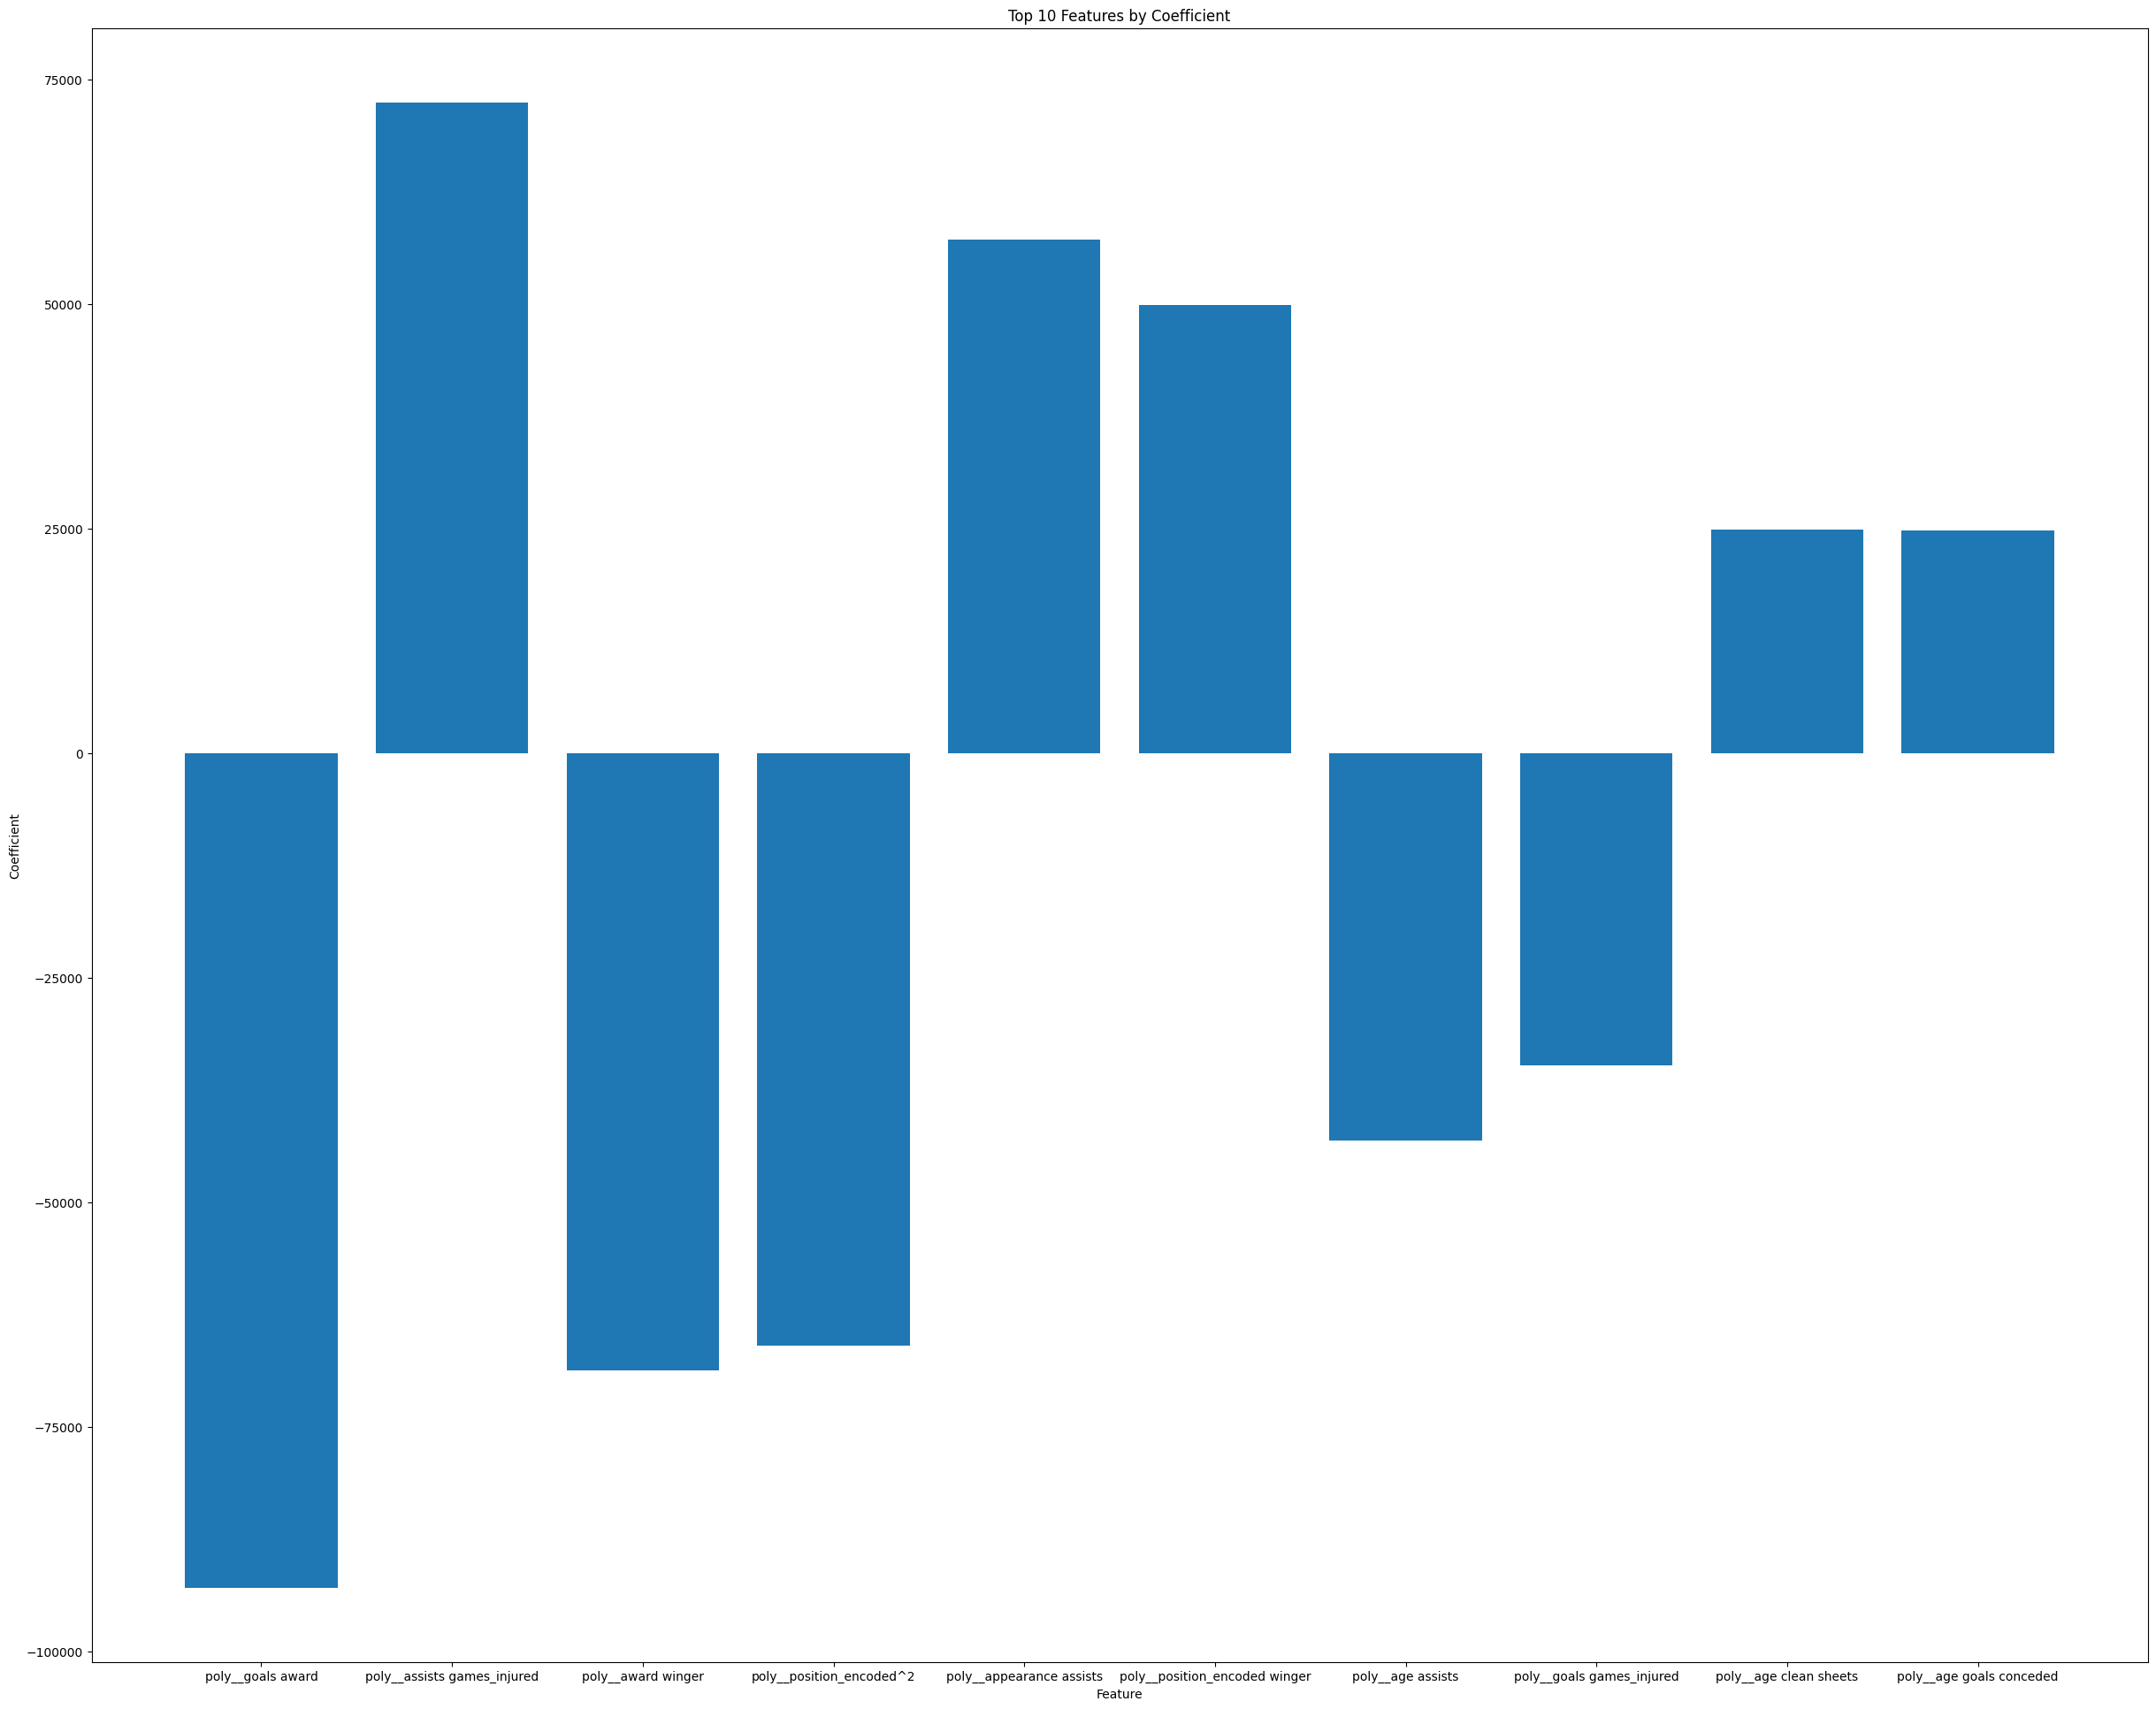

In [198]:

# Separate the coefficients and feature names
coefs, features = zip(*top_10_features)
plt.figure(figsize=(30, 24))
# Create a bar chart
plt.bar(features, coefs)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Top 10 Features by Coefficient')
plt.show()

# 5. Next Steps


Our analysis using the polynomial regression model has provided valuable insights into the key drivers of football player transfer values. However, there's always room for further exploration. Here are some suggestions for next steps:

1. Feature Engineering:

Derive new features: Explore creating new features based on existing ones. For example, goals per game ratio, assist per game ratio, or injury rate (games injured divided by total games played). These might better capture a player's performance and injury proneness.
Feature Selection Techniques: Consider using feature selection techniques like LASSO regression or feature importance analysis to identify a smaller set of the most influential features. This can simplify the model and potentially improve interpretability.

2. External Data Integration:

Market Factors: Incorporate external data like team financial situation, league competitiveness, or transfer market trends. These factors can influence a player's transfer value beyond just their individual performance.
Player Potential: Explore including data on player potential (e.g., age, youth team performance) to capture the value of promising young players who might not have extensive stats yet.

## Possible Flaws in the Current Model and Next Steps

While the polynomial regression model provides valuable insights, there are potential limitations to consider:

Overfitting: Although the test accuracy seems reasonable, using a model with 560 features (poly_model) increases the risk of overfitting. The model might be memorizing specific patterns in the training data that might not generalize well to unseen players.

Limited Feature Set: The current analysis focuses on player attributes, but external factors like team finances, league competitiveness, and transfer market trends can influence transfer values.

Interpretability vs. Accuracy Trade-off: While the polynomial model offers some interpretability, analyzing the interplay between multiple polynomial terms can become complex.

Plan for Revisiting the Analysis
Here's a plan to address these limitations and potentially improve the model's performance:

1. Feature Engineering and Selection:

Derive new features: Create new features based on existing ones (e.g., goals per game, injury rate). This can better capture player performance and injury proneness.
Feature selection: Apply techniques like LASSO regression or feature importance analysis to identify a smaller set of the most influential features. This reduces model complexity and potentially improves interpretability.
 
2. External Data Integration:

Market factors: Incorporate data on team financial situations, league competitiveness, or transfer market trends. These external factors can significantly influence a player's transfer value.
Player potential: Explore including data on player potential (e.g., age, youth team performance) to capture the value of promising young players who might not have extensive stats yet.

3.  Evaluation and Improvement:

Cross-validation: Implement cross-validation techniques to get a more robust estimate of model performance and avoid overfitting on a specific training/test split.
Hyperparameter tuning: Further refine the hyperparameters of the chosen model (e.g., polynomial regression) to potentially improve its performance.
Choosing the Right Path:

Maintain interpretability: Focus on feature engineering and hyperparameter tuning of the polynomial model while incorporating a smaller set of well-chosen features.

Maximize accuracy: Explore external data sources like market factors and player potential. This might require sacrificing some interpretability for a potentially more accurate model.
By revisiting the analysis with these considerations, can develop a more robust and informative model for predicting football player transfer values.